In [1]:
from keras.datasets import reuters
(train_data,train_labels) , (test_data,test_labels) = reuters.load_data(
                                                                        num_words=10000)

2023-08-08 15:25:09.717718: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Data type : " + str(type(train_data)))
print("Data shape : " + str(train_data.shape))
print("Train sample number : " + str(len(train_data)))
print("Test sample number : " + str(len(test_data)))
print("Example Sample : " + str(train_data[0]))

Data type : <class 'numpy.ndarray'>
Data shape : (8982,)
Train sample number : 8982
Test sample number : 2246
Example Sample : [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


Every sample is array of integers that each integer corresponds
to a word
Train labels are integers between 0-45 which corresponds to a news topic.
Goal is for new news,guessing a category,so finding label

In [3]:
import numpy as np
def vectorize_sequences( sequences , dimension = 10000 ):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
from keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
print(one_hot_train_labels[0])
print(train_labels[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3


In [7]:
from keras import layers
from keras import models


model = models.Sequential()
model.add( layers.Dense( 64 , activation = 'relu' , input_shape=(10000,) ) )
model.add( layers.Dense( 64 , activation = 'relu' ) )
model.add( layers.Dense( 46 , activation = 'softmax' ) )



In [8]:
model.compile(  optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 57ms/step - loss: 2.8725 - accuracy: 0.4887 - val_loss: 2.0206 - val_accuracy: 0.5830
Epoch 2/20
16/16 [==============================] - 0s 25ms/step - loss: 1.6839 - accuracy: 0.6501 - val_loss: 1.4701 - val_accuracy: 0.6680
Epoch 3/20
16/16 [==============================] - 0s 24ms/step - loss: 1.2556 - accuracy: 0.7348 - val_loss: 1.2270 - val_accuracy: 0.7320
Epoch 4/20
16/16 [==============================] - 0s 24ms/step - loss: 1.0095 - accuracy: 0.7866 - val_loss: 1.1067 - val_accuracy: 0.7580
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.8344 - accuracy: 0.8256 - val_loss: 1.0152 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6936 - accuracy: 0.8500 - val_loss: 0.9696 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5778 - accuracy: 0.8789 - val_loss: 0.9204 - val_accuracy: 0.8050
Epoch 8/20
16

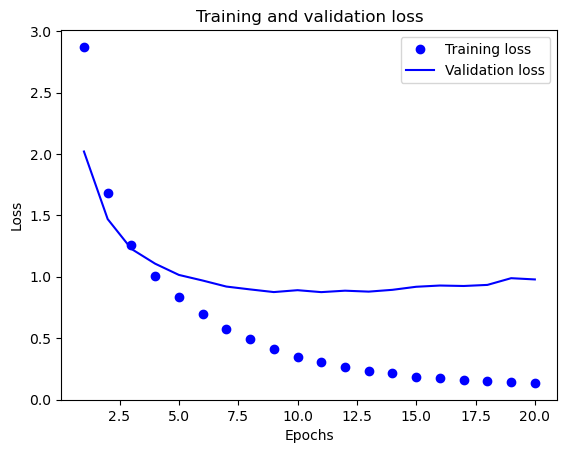

In [11]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

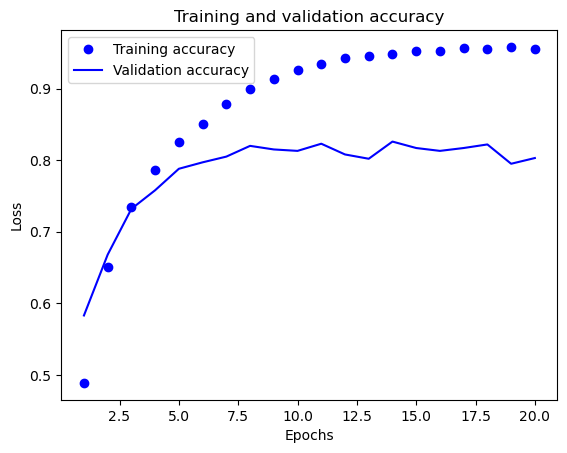

In [12]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We see that after 9 epochs,model starts to overfit

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 40ms/step - loss: 2.6093 - accuracy: 0.5298 - val_loss: 1.7248 - val_accuracy: 0.6480
Epoch 2/9
16/16 [==============================] - 0s 28ms/step - loss: 1.4582 - accuracy: 0.6887 - val_loss: 1.3130 - val_accuracy: 0.7150
Epoch 3/9
16/16 [==============================] - 0s 28ms/step - loss: 1.1184 - accuracy: 0.7572 - val_loss: 1.1365 - val_accuracy: 0.7360
Epoch 4/9
16/16 [==============================] - 0s 24ms/step - loss: 0.9134 - accuracy: 0.8022 - val_loss: 1.0399 - val_accuracy: 0.7690
Epoch 5/9
16/16 [==============================] - 0s 30ms/step - loss: 0.7540 - accuracy: 0.8389 - val_loss: 0.9618 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 0s 29ms/step - loss: 0.6290 - accuracy: 0.8653 - val_loss: 0.9286 - val_accuracy: 0.7990
Epoch 7/9
16/16 [==============================] - 1s 34ms/step - loss: 0.5187 - accuracy: 0.8890 - val_loss: 0.9150 - val_accuracy: 0.7960
Epoch 8/9
16/16 [===

In [19]:
print(results)

[0.9343135356903076, 0.7902938723564148]


In [20]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [25]:
print("Sample prediction shape : " + str(predictions[0].shape))
print("Sum of all 46 probabilities : " + str(np.sum(predictions[0])))
print("Predicted category : " + str(np.argmax(predictions[0])))

Sample prediction shape : (46,)
Sum of all 46 probabilities : 1.0000001
Predicted category : 3
